In [ ]:
from getpass import getpass

rdm_url = 'https://rdm.example.com/'
rdm_project_url_1 = 'https://rdm.example.com/project1/'
idp_name = 'GakuNin RDM IdP'
default_result_path = None
close_on_fail = False
transition_timeout = 60000

In [2]:
import tempfile

work_dir = tempfile.mkdtemp()
if default_result_path is None:
    default_result_path = work_dir
work_dir

'/tmp/tmplpqyp6t1'

# GakuNinRDM 総合テスト [未ログイン]

- サブシステム名: ログイン
- ページ/アドオン: トップページ
- 機能分類: アクセス制御確認
- シナリオ名: 未ログイン時挙動確認
- 用意するテストデータ: URL一覧

## ウェブブラウザの新規プライベートウィンドウでGRDMトップページを表示する

GRDMトップページが表示されること

In [16]:
import importlib
import pandas as pd

import scripts.playwright
importlib.reload(scripts.playwright)

from scripts.playwright import *
from scripts import grdm

await init_pw_context(close_on_fail=close_on_fail, last_path=default_result_path)

('20250328-225607', '/tmp/tmpwv5t703j')

Start epoch: 1743202568.1434162 seconds


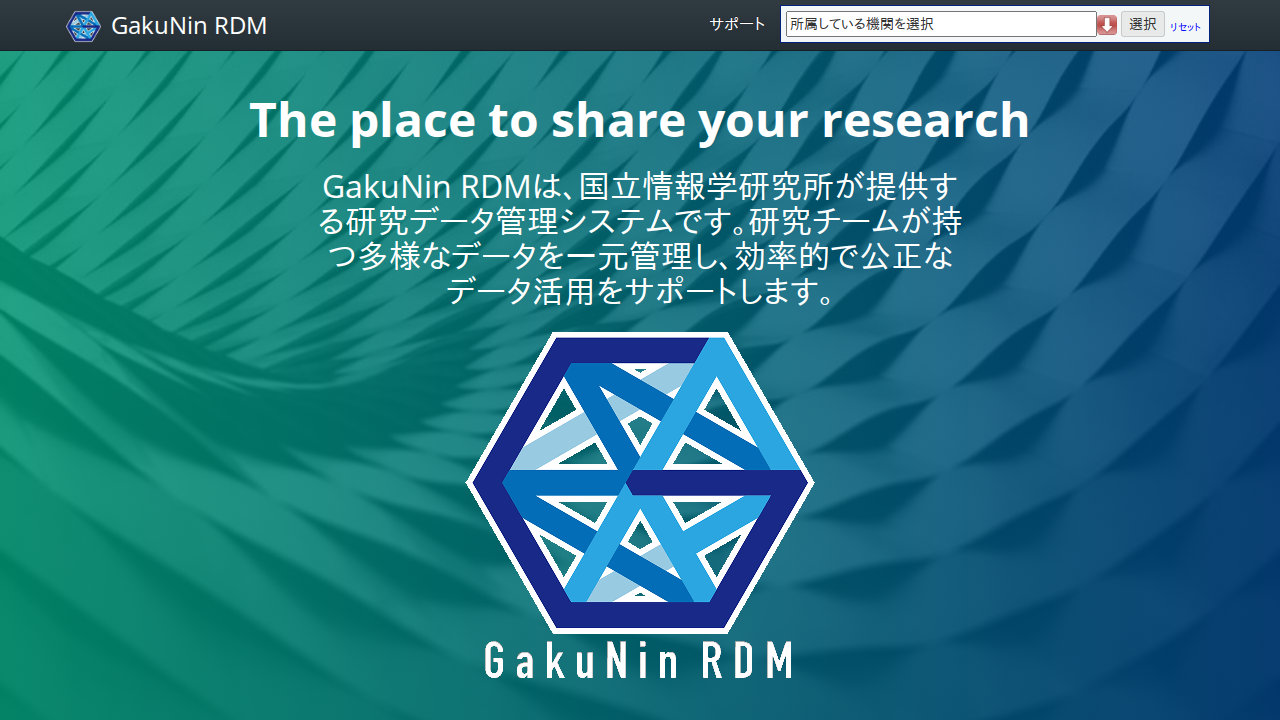

In [17]:
import time

async def _step(page):
    await page.goto(rdm_url)

    # 同意する ボタンが現れるまで待つ
    await expect(page.locator('//button[text() = "同意する"]')).to_be_visible(timeout=transition_timeout)

    # 同意する をクリック
    await page.locator('//button[text() = "同意する"]').click()

    # 同意する が表示されなくなったことを確認
    await expect(page.locator('//button[text() = "同意する"]')).to_have_count(0, timeout=500)

await run_pw(_step)

## GRDMロゴマークをクリックする
GRDMトップページが表示されること

Start epoch: 1743202570.0154998 seconds


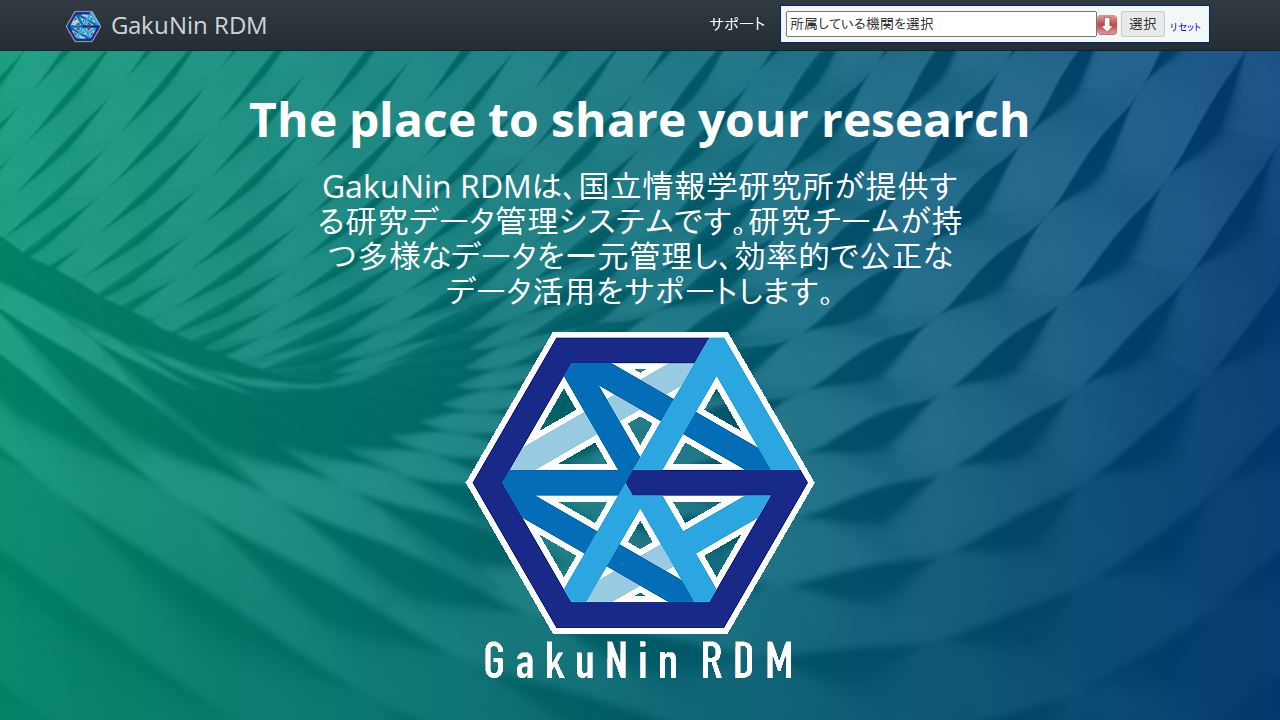

In [18]:
async def _step(page):
    await page.locator('//div[contains(@class, "service-name")]').click()

    # 選択ボタンが有効になったことを確認
    await expect(page.locator('//*[@id = "dropdown_img"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## GakuNin Embeded DSのプルダウンを展開する
IdPの一覧が表示され選択可能なこと

Start epoch: 1743202654.8928783 seconds


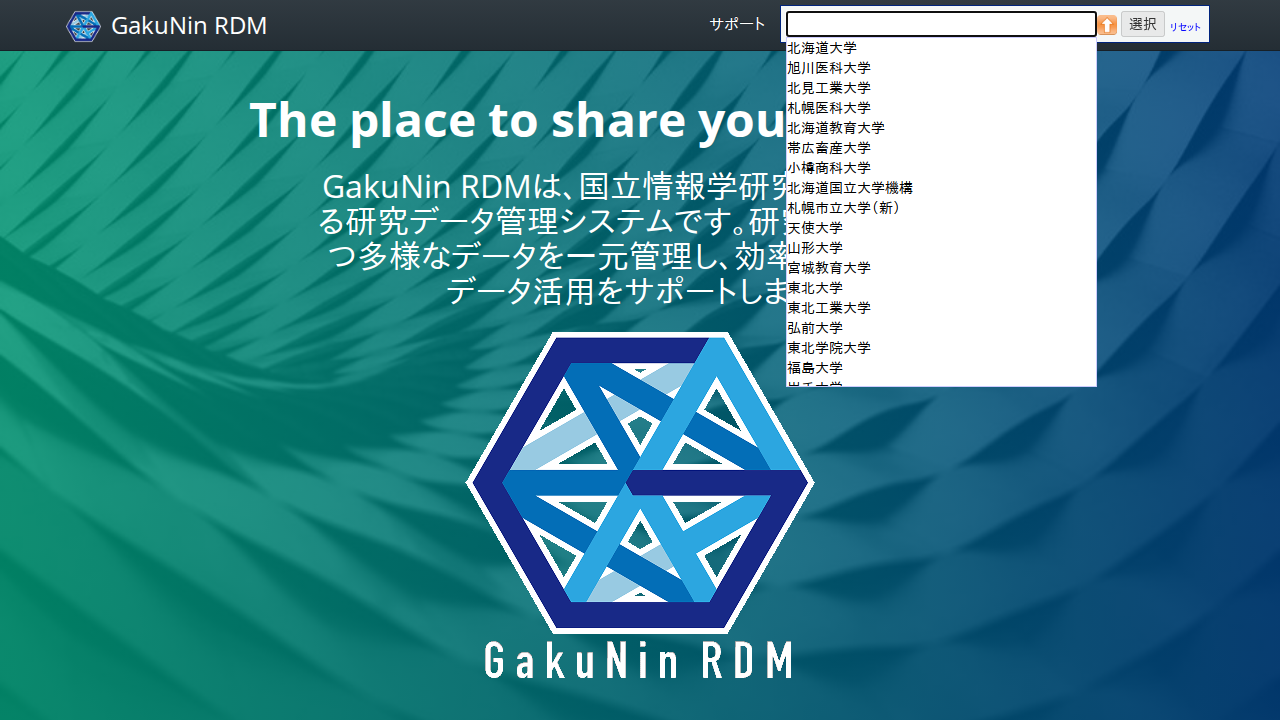

In [21]:
async def _step(page):
    await page.locator('//*[@id = "dropdown_img"]').click()

    # IdPが要素として作成されることを確認
    locator = page.locator(f'//*[@class = "list_idp" and text() = "{idp_name}"]')
    await expect(locator).to_be_visible(timeout=transition_timeout)
    time.sleep(5)

await run_pw(_step)

## 既存プロジェクトダッシュボードURLアドレスバーに入力する
GakuNinDSの機関選択画面が表示されること

Start epoch: 1743202718.8947117 seconds


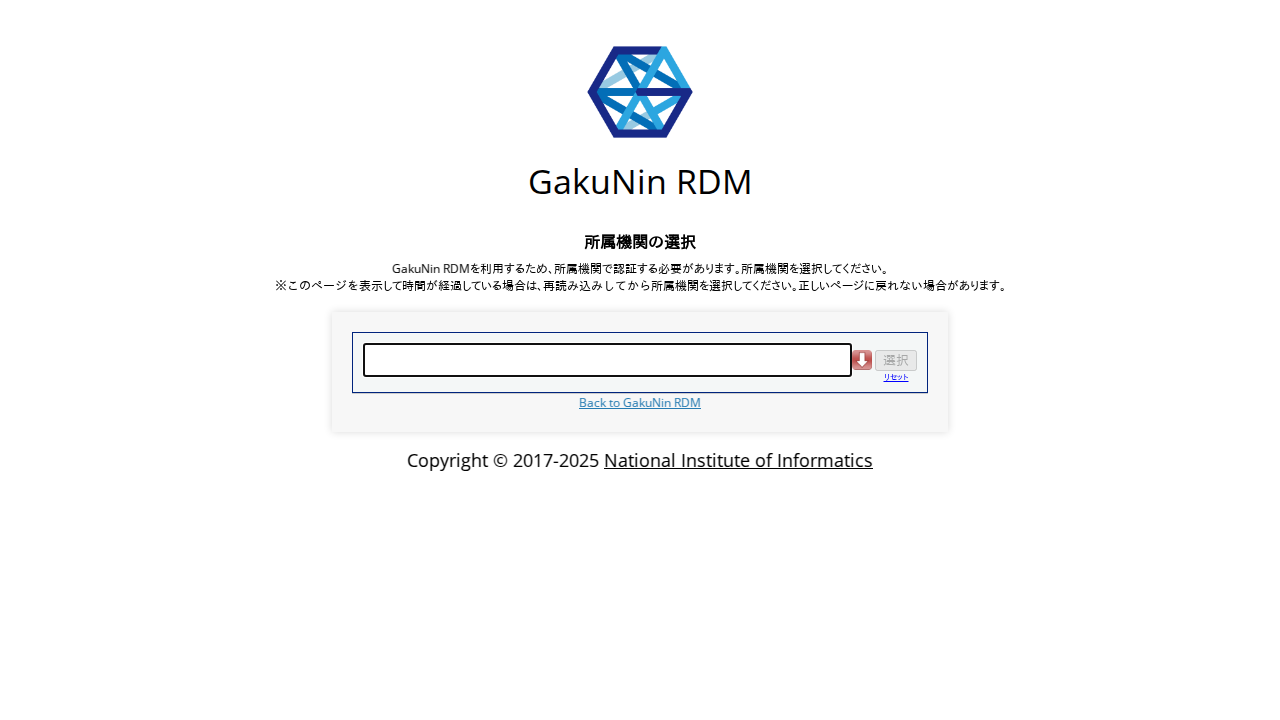

In [23]:
async def _step(page):
    await page.goto(rdm_project_url_1)

    # 同意する ボタンが現れるまで待つ
    await expect(page.locator('//*[text() = "所属機関の選択"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

終了処理を実施。

In [24]:
await finish_pw_context()

Video: /tmp/tmplpqyp6t1/video-1.webm
HAR: /tmp/tmplpqyp6t1/har.zip


In [25]:
!rm -fr {work_dir}